<a href="https://colab.research.google.com/github/jurados/Supernovae_DeepLearning/blob/main/SN_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

rc_params = {
    'lines.linewidth': 2,  # Set line width to 2 points
    'font.family': 'STIXGeneral',  # Set color cycle for axes
    'ytick.direction': 'in',  # Set figure size in inches
    'xtick.direction': 'in',  # Set default font family
}

matplotlib.rcParams.update(rc_params)

/home/jurados/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
tns_df = pd.read_csv("/gdrive/MyDrive/Supernovas_ThesisSteve/SN_dataset/tns_public_objects.csv", comment="#",skiprows=[0])
tns_df.head()

,objid,name_prefix,name,ra,declination,redshift,typeid,type,reporting_groupid,reporting_group,...,discoverymag,discmagfilter,filter,reporters,time_received,internal_names,Discovery_ADS_bibcode,Class_ADS_bibcodes,creationdate,lastmodified
0,151419,AT,2024isr,346.788460,-13.585033,NaN,NaN,NaN,18.0,ATLAS,...,18.5830,72.0,orange,"J. Tonry, L. Denneau, H. Weiland, A. Lawrence,...",2024-05-12 18:19:53,ATLAS24hfx,NaN,NaN,2024-05-12 18:19:54,2024-05-12 18:19:54
1,151418,AT,2024isq,189.165841,4.132965,NaN,NaN,NaN,48.0,ZTF,...,19.6170,110.0,g,"Jesper Sollerman (SU), Christoffer Fremling (C...",2024-05-12 17:32:43,ZTF24aahpfqt,NaN,NaN,2024-05-12 17:32:44,2024-05-12 17:32:44
2,151417,AT,2024isp,246.840611,27.023054,NaN,NaN,NaN,48.0,ZTF,...,20.8814,110.0,g,"Eli Gendreau-Distler (UC Berkeley), Jesper Sol...",2024-05-12 17:23:28,ZTF24aamqkfd,NaN,NaN,2024-05-12 17:23:29,2024-05-12 17:23:29
3,151416,AT,2024iso,160.761639,3.544378,NaN,NaN,NaN,48.0,ZTF,...,20.4659,110.0,g,"Eli Gendreau-Distler (UC Berkeley), Jesper Sol...",2024-05-12 17:15:10,ZTF24aamtwlb,NaN,NaN,2024-05-12 17:15:11,2024-05-12 17:15:11
4,151415,AT,2024isn,165.460945,44.449401,NaN,NaN,NaN,48.0,ZTF,...,18.0834,110.0,g,"Kate Bostow (UC Berkeley), Jesper Sollerman (S...",2024-05-12 17:11:58,ZTF18aciccvy,NaN,NaN,2024-05-12 17:11:59,2024-05-12 17:11:59


In [ ]:
def prepared_tns(df):

    '''
    sasasa
    '''

    # Mask filters by Supernovae (SN)
    # from the initial DataSet
    mask = df.name_prefix == 'SN'

    # Use the previos mask
    df = df.loc[mask]

    # Dropping by myself the useless columns
    try:
        columns_droped = ['reporting_groupid', 'reporting_group',
       'source_groupid', 'source_group', 'discoverydate', 'discoverymag',
       'discmagfilter','reporters', 'time_received',
       'internal_names', 'Discovery_ADS_bibcode', 'Class_ADS_bibcodes',
       'creationdate', 'lastmodified']
        df = df.drop(columns_droped, axis=1)
    except:
        pass

    return df

In [ ]:
tns_df = prepared_tns(tns_df)
tns_df

,objid,name_prefix,name,ra,declination,redshift,typeid,type,filter
78,150523,SN,2024hlo,214.555224,-3.120845,0.044958,3.0,SN Ia,g
104,151292,SN,2024inv,166.634010,11.378492,0.004528,3.0,SN Ia,g
107,150624,SN,2024hpj,267.199005,37.217286,0.016000,13.0,SN IIn,g
108,150338,SN,2024hfe,237.380947,19.969493,0.102000,3.0,SN Ia,g
178,151176,SN,2024ijp,197.605738,6.334285,0.050000,3.0,SN Ia,g
...,...,...,...,...,...,...,...,...,...
138420,6336,SN,2013hj,138.026210,-15.429440,NaN,10.0,SN II,NaN
138421,6309,SN,2013gj,40.291670,-21.024780,NaN,10.0,SN II,NaN
138422,6201,SN,2013cj,256.220630,12.919560,NaN,13.0,SN IIn,NaN
138423,6196,SN,2013ce,173.961670,34.284080,NaN,11.0,SN IIP,NaN


<Axes: ylabel='type'>

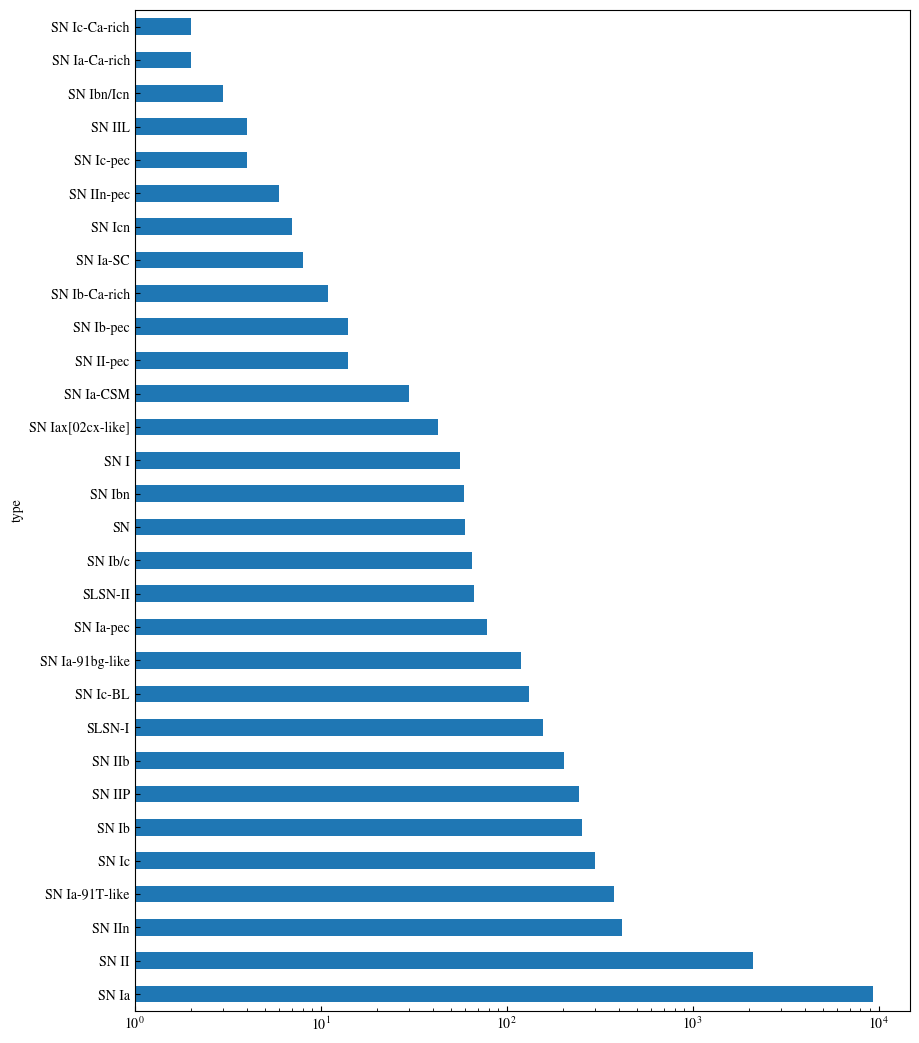

In [ ]:
fig, ax = plt.subplots(figsize=(10, 13))
tns_df.type.value_counts().plot.barh(log=True, ax=ax)

In [ ]:
import psycopg2
import requests

In [ ]:
credentials_file = "https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json"
params = requests.get(credentials_file).json()["params"]
conn = psycopg2.connect(dbname=params["dbname"], user=params["user"], host=params["host"], password=params["password"])

In [ ]:
def ztf_crossmatch(conn, df, search_radius=1):

    '''
    conn: connection to database
    df: external catalog dataframe (with columns id_source, ra, dec)
    search_radius: external radius in arcsec (default=1)

    The output is a dataframe with the source id, ra, and dec,
    as well as the ALeRCE database meanra, meandec, the crossmatch distance
    in degrees and the time of first detection according to the ALeRCE database
    '''

    # fix the dataframe
    objects = []
    for _,row in df.iterrows():
        objects.append(f"(\'{row.id_source}\', {row.ra}, {row.dec})")
    objects_str = ",\n".join(objects)

    # convert the radius into degrees
    search_radius = search_radius / 3600

    # prepare the query

    query = """
    WITH catalog ( source_id, ra, dec) AS (
        VALUES
            {values}
    )
    SELECT
        c.source_id, c.ra, c.dec, o.oid, o.meanra, o.meandec, q3c_dist(c.ra,c.dec,o.meanra,o.meandec),
        o.firstmjd

    FROM object o, catalog c
        /*
         * It is REALLY important to first use the catalog then the object ra,dec for speed. The radius is in degrees.
         */
    WHERE
        q3c_join(c.ra, c.dec,o.meanra, o.meandec, {radius})
    """

    # final query string
    query_str = query.format(values=objects_str, radius=search_radius) # radius in degrees

    # do the query
    try:
        matches = pd.read_sql(query_str,conn)
        matches["q3c_dist"] = matches.q3c_dist * 3600
        matches.rename({"q3c_dist": "dist_arcsec"}, axis=1, inplace=True)
        return matches
    except:
        print("Error accessing the database. Most common causes are timeout errors or wrongly formatted input query.")

In [ ]:
dfsn = tns_df[["name", "ra", "declination"]].rename({"name": "id_source", "declination":"dec"},axis=1)

results = ztf_crossmatch(conn, dfsn)
results

<ipython-input-9-0693beb9a7b3>:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  matches = pd.read_sql(query_str,conn)


,source_id,ra,dec,oid,meanra,meandec,dist_arcsec,firstmjd
0,2024hlo,214.555224,-3.120845,ZTF24aalbzkr,214.555235,-3.120857,0.056920,60429.294479
1,2024inv,166.634010,11.378492,ZTF24aamtvxb,166.634025,11.378478,0.073522,60440.276505
2,2024hpj,267.199005,37.217286,ZTF24aaleeji,267.199022,37.217239,0.174382,60430.368148
3,2024hfe,237.380947,19.969493,ZTF24aakrsww,237.380942,19.969482,0.044806,60421.362269
4,2024ijp,197.605738,6.334285,ZTF24aalougs,197.605723,6.334281,0.054624,60432.296875
...,...,...,...,...,...,...,...,...
10850,2016cda,232.964701,37.412412,ZTF19aamqjsh,232.964728,37.412412,0.077872,58558.284549
10851,2016bey,174.417625,57.078194,ZTF18aarefgc,174.417732,57.078000,0.727443,60315.469572
10852,2016ayf,206.252171,61.280250,ZTF18aajleyh,206.252390,61.280077,0.729121,58276.285139
10853,2016nx,57.039590,10.269090,ZTF22abntkbk,57.039556,10.269070,0.139307,59870.374664


<Axes: ylabel='Frequency'>

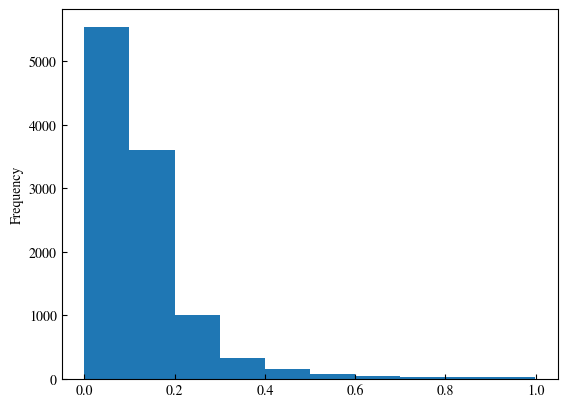

In [ ]:
results.dist_arcsec.plot.hist()

In [ ]:
def supernovae_ztfxtns(tns_df, xztf_df,apply_mask=True):

    fmap = {'TDE': "TDE",
        'Nova': "CV/Nova",
        'CV': "CV/Nova",
        'SN Ia-91bg-like': "SNIa",
        'SN Ia': "SNIa",
        'SN Ia-91T-like': "SNIa",
        'SN Ia-CSM': "SNIa",
        'SN Ia-SC': "SNIa",
        'SN Ia-pec': "SNIa",
        'SN Iax[02cx-like]': "SNIa",
        'SN Ib': "SNIbc",
        'SN Ib-Ca-rich': "SNIbc",
        'SN Ib-pec': "SNIbc",
        'SN Ib/c': "SNIbc",
        'SN Ibn': "SNIbc",
        'SN Ic': "SNIbc",
        'SN Icn': "SNIbc",
        'SN Ic-BL': "SNIbc",
        'SN Ic-pec': "SNIbc",
        'SN IIb': "SNIIb",
        'SN II': "SNII",
        'SN II-pec' : "SNII",
        'SN IIL': "SNII",
        'SN IIP': "SNII",
        'SN IIn': "SNIIn",
        'SN IIn-pec': "SNIIn",
        'SLSN-I': "SLSN",
        'SLSN-II': "SLSN",
        'SN Ibn/Icn': "SNIbc",
        'SN Ia-Ca-rich': "SNIa",
        'SN Ic-Ca-rich': "SNIc",
        'SN I': 'SNI'
    }

    xztf_df = xztf_df.copy()
    dfsn = tns_df.copy()

    dfsn = dfsn.replace({'type':fmap})
    dfsn = dfsn.rename({'name':'source_id'},axis=1)
    xztf_df = xztf_df.merge(dfsn[['source_id','type','redshift','filter']], on='source_id', how='left')
    dfsn.set_index('source_id', inplace=True)
    dfsn = dfsn.loc[xztf_df.source_id]

    # Mask will use to obtain a subset of a specific class
    # of supernovae. The classes are: CV/Nova, SNIa, SNIbc,
    # SNIIb, SNII, SNIIn, SLSN

    if apply_mask == True:
        #mask = dfsn.type == 'SNII'
        mask = dfsn.type.isin(('SNII', 'SNIIn', 'SNIIb'))
        dfsn = dfsn.loc[mask]

    dfsn.reset_index(inplace=True)
    #dfsn = dfsn[['oid','soruce_id','ra','dec','meanra','meandec','dist_arcsec','firstmjd','type','redshift','filter']]
    #dfsn = dfsn.reindex_axis(['oid','soruce_id','ra','dec','meanra','meandec','dist_arcsec','firstmjd','type','redshift','filter'], axis=1)

    xztf_df.set_index('source_id',inplace=True)
    xztf_df = xztf_df.loc[dfsn.source_id]
    xztf_df.reset_index(inplace=True)

    return xztf_df

In [ ]:
dfsn = supernovae_ztfxtns(tns_df=tns_df,xztf_df = results)
dfsn

,source_id,ra,dec,oid,meanra,meandec,dist_arcsec,firstmjd,type,redshift,filter
0,2024hpj,267.199005,37.217286,ZTF24aaleeji,267.199022,37.217239,0.174382,60430.368148,SNIIn,0.01600,g
1,2024grw,269.590167,9.681511,ZTF24aajxppf,269.590157,9.681531,0.081962,60418.372431,SNII,0.02140,orange
2,2024fqs,345.615893,27.205783,ZTF24aaefwoh,345.615892,27.205772,0.040132,60403.523194,SNII,0.03400,r
3,2024eza,222.050599,26.438264,ZTF24aahsukk,222.050575,26.438270,0.078642,60391.387026,SNII,0.05096,g
4,2024igg,227.378793,54.505622,ZTF24aamlalc,227.378816,54.505612,0.058527,60437.304398,SNII,0.01000,g
...,...,...,...,...,...,...,...,...,...,...,...
2371,2017eaw,308.684333,60.193289,ZTF19aarfucx,308.684258,60.193290,0.133440,58593.364699,SNII,0.00013,Clear
2372,2017aym,219.424083,2.285681,ZTF19aatmtne,219.424059,2.285746,0.248080,58588.377998,SNII,0.00580,G
2373,2016ieq,320.604958,-11.948561,ZTF19abkaxlf,320.604931,-11.948554,0.099859,58668.442280,SNIIn,0.06600,G
2374,2016ezh,29.519746,-0.872705,ZTF18abreeqx,29.519788,-0.872755,0.235512,58365.418322,SNII,0.08000,w


In [ ]:
def querys_alerce(dfsn):

    query_1='''
    SELECT
        detection.oid, detection.fid, detection.mjd, detection.magpsf, detection.sigmapsf, derection.isdiffpos, 
        detection.rfid, detection.candid 
    FROM
        detection

    WHERE
        oid in (%s)
    ''' % ",".join(["'%s'" % oid for oid in dfsn.oid.unique()])

    SNe_detection = pd.read_sql_query(query_1, conn)


    query_2='''
    SELECT
        forced_photometry.oid, forced_photometry.fid, forced_photometry.mjd, forced_photometry.mag,
        forced_photometry.e_mag, forced_photometry.pid
    FROM
        forced_photometry

    WHERE
        oid in (%s)
    ''' % ",".join(["'%s'" % oid for oid in dfsn.oid.unique()])

    SNe_forced = pd.read_sql_query(query_2, conn)

    SNe_forced['forced'] = 'yes'

    SNe_detection = SNe_detection.rename({'magpsf':'mag', 'sigmapsf':'e_mag'},axis=1)

    result = pd.concat([SNe_detection,SNe_forced])
    result.sort_values(by='oid').reset_index(inplace=True)
    result['forced'] = result['forced'].fillna('no')

    result = result.merge(dfsn[['source_id','oid','type','redshift','filter']], on='oid', how='left')

    return result

In [ ]:
main_sn = querys_alerce(dfsn=dfsn)

<ipython-input-29-f45d04518d1a>:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SNe_detection = pd.read_sql_query(query_1, conn)
<ipython-input-29-f45d04518d1a>:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SNe_forced = pd.read_sql_query(query_2, conn)


In [ ]:
main_sn

# cambair el nombre el filter porque es reservada

,oid,fid,mjd,mag,e_mag,forced,source_id,type,redshift,filter
0,ZTF17aaaipbw,2,58371.472130,19.820711,0.168984,no,2017ixz,SNIIb,0.024,orange
1,ZTF17aaaipbw,2,58374.515428,19.959324,0.179207,no,2017ixz,SNIIb,0.024,orange
2,ZTF17aaaipbw,2,58377.464780,19.914448,0.173840,no,2017ixz,SNIIb,0.024,orange
3,ZTF17aaaipbw,2,58380.473310,19.946108,0.188807,no,2017ixz,SNIIb,0.024,orange
4,ZTF17aaaipbw,2,58389.518542,19.876314,0.189524,no,2017ixz,SNIIb,0.024,orange
...,...,...,...,...,...,...,...,...,...,...
214341,ZTF18abmewuv,2,60449.476817,17.923702,0.026917,yes,2018cgq,SNII,NaN,G
214342,ZTF18abmewuv,2,60443.488518,21.364439,1.412201,yes,2018cgq,SNII,NaN,G
214343,ZTF18abmewuv,2,60443.488518,21.364439,1.412201,yes,2018cgq,SNII,NaN,G
214344,ZTF18abmewuv,2,60450.473762,17.944361,0.042749,yes,2018cgq,SNII,NaN,G


<Axes: ylabel='type'>

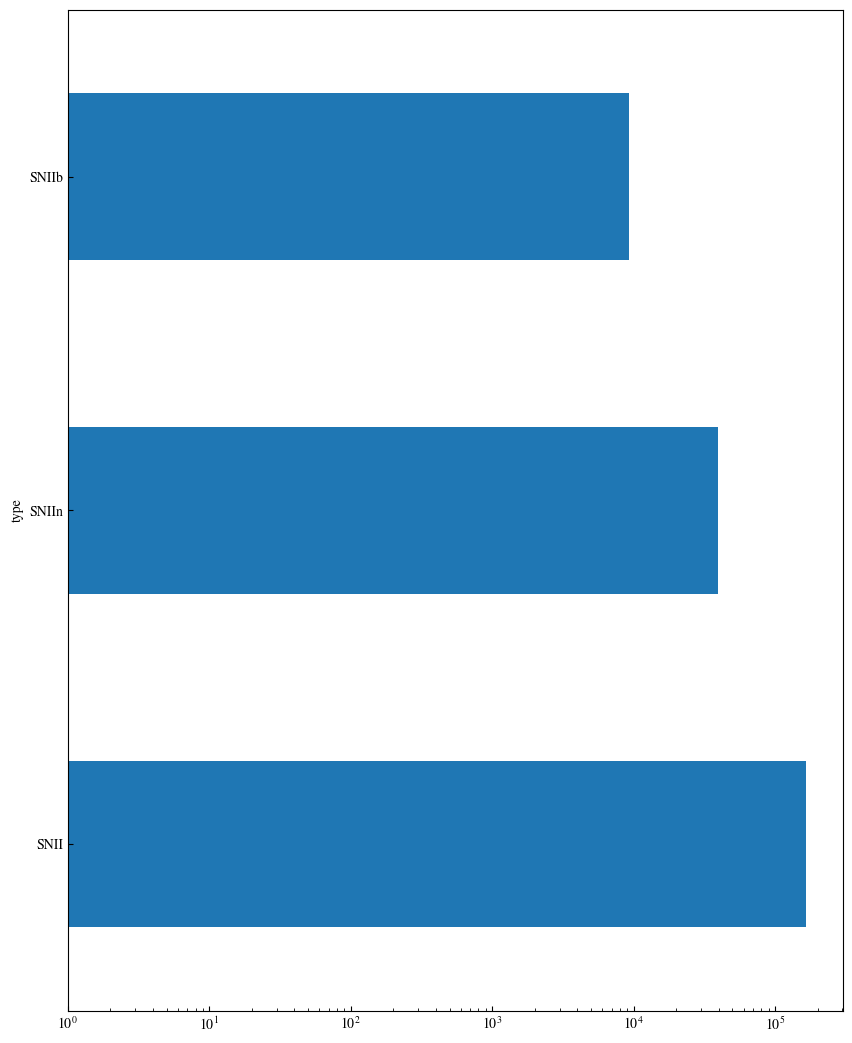

In [ ]:
fig, ax = plt.subplots(figsize=(10, 13))
main_sn.type.value_counts().plot.barh(log=True, ax=ax)

In [ ]:
len(main_sn.oid.unique())

2227

In [ ]:
main_sn.to_csv('SN_dataset_ztfxtns.csv', index=False)

OSError: [Errno 95] Operation not supported: 'SN_dataset_ztfxtns.csv'

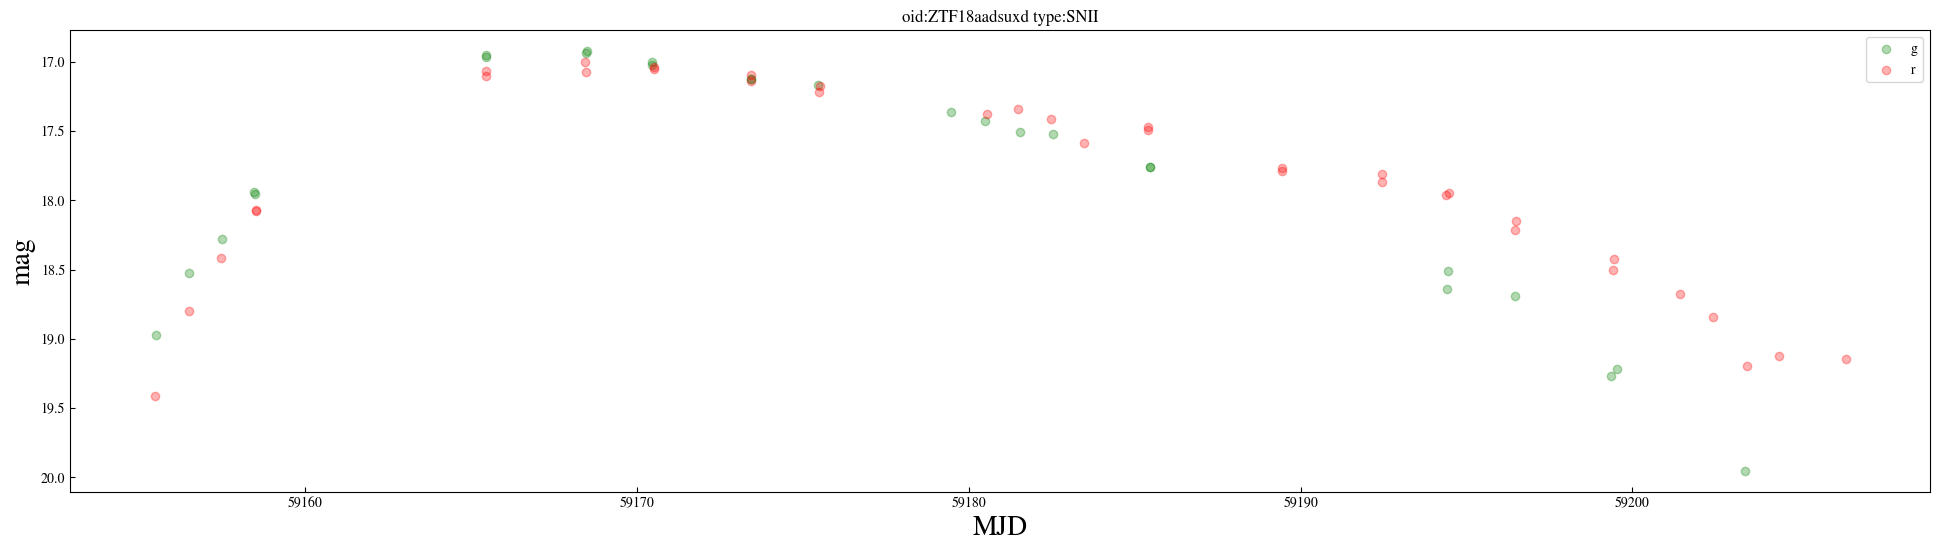

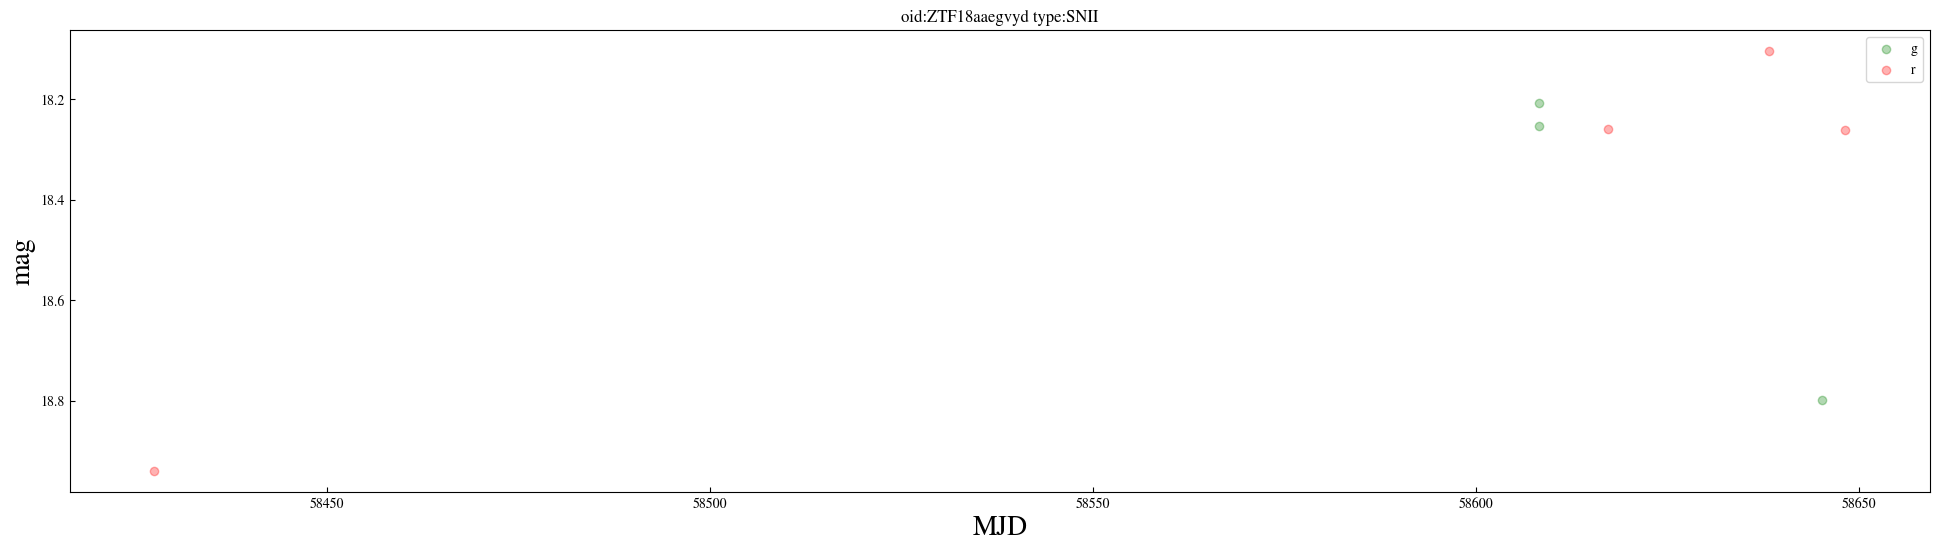

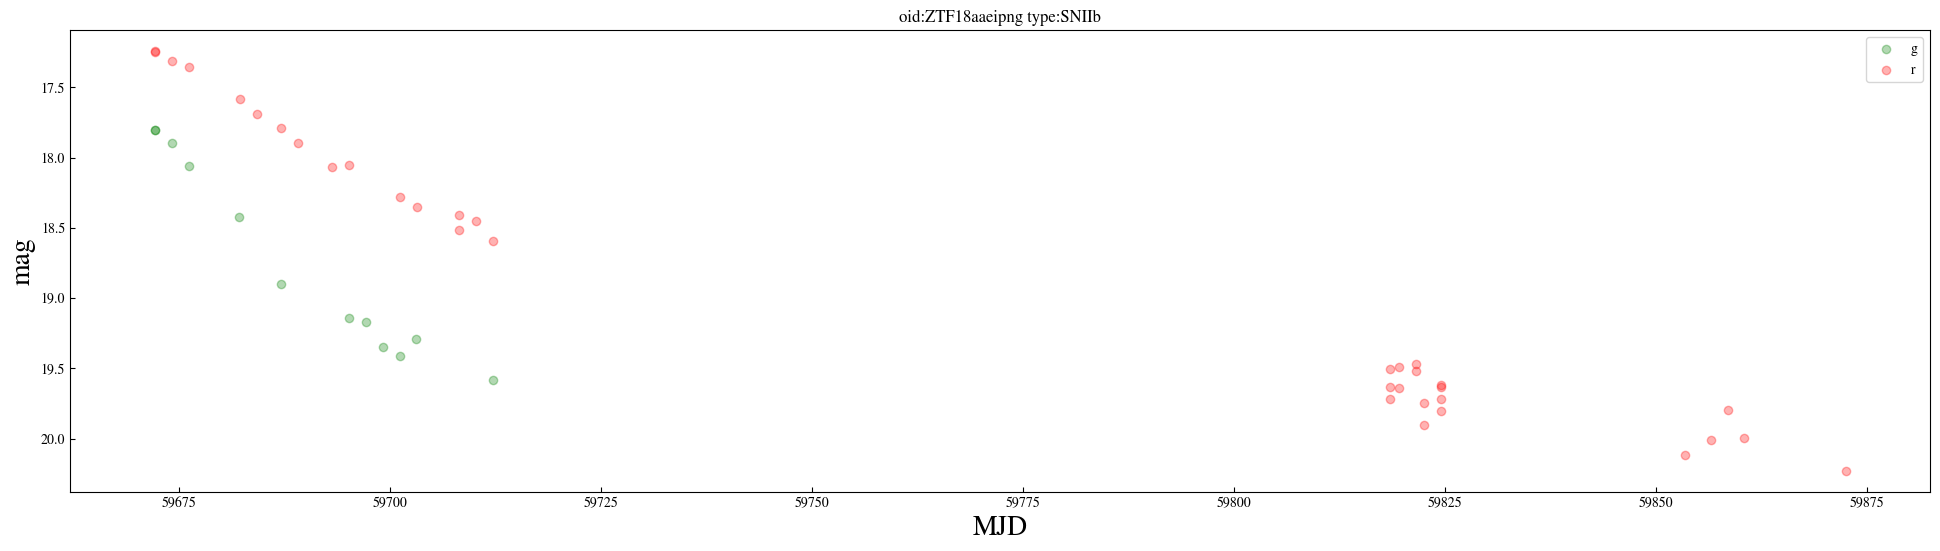

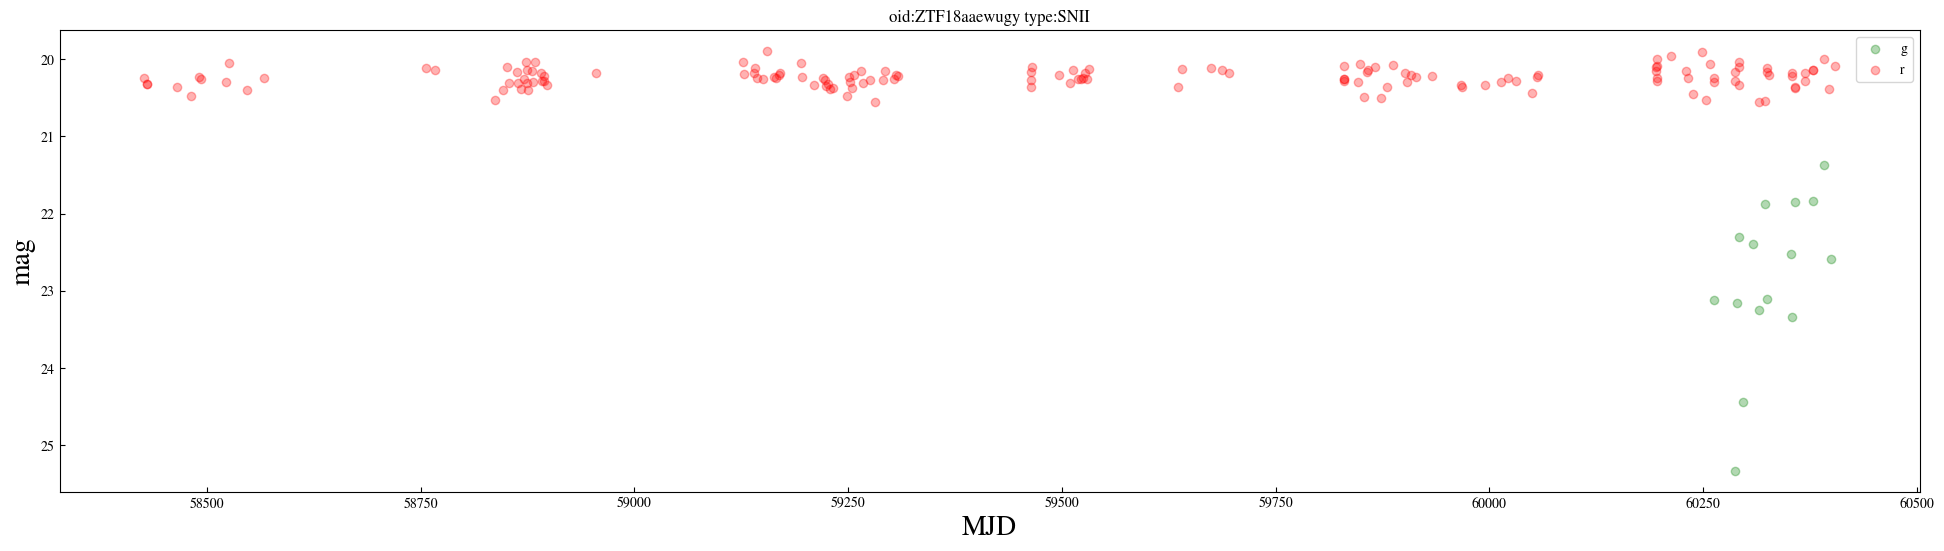

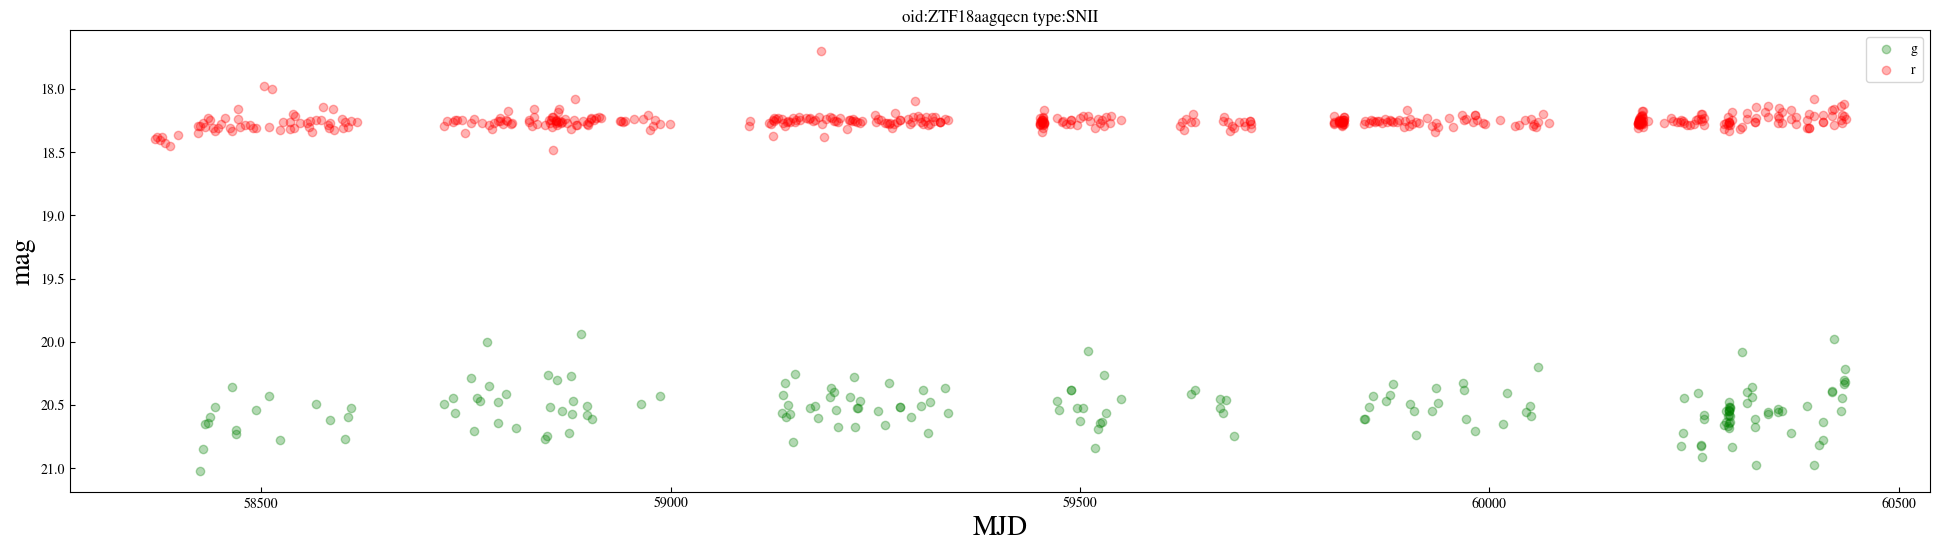

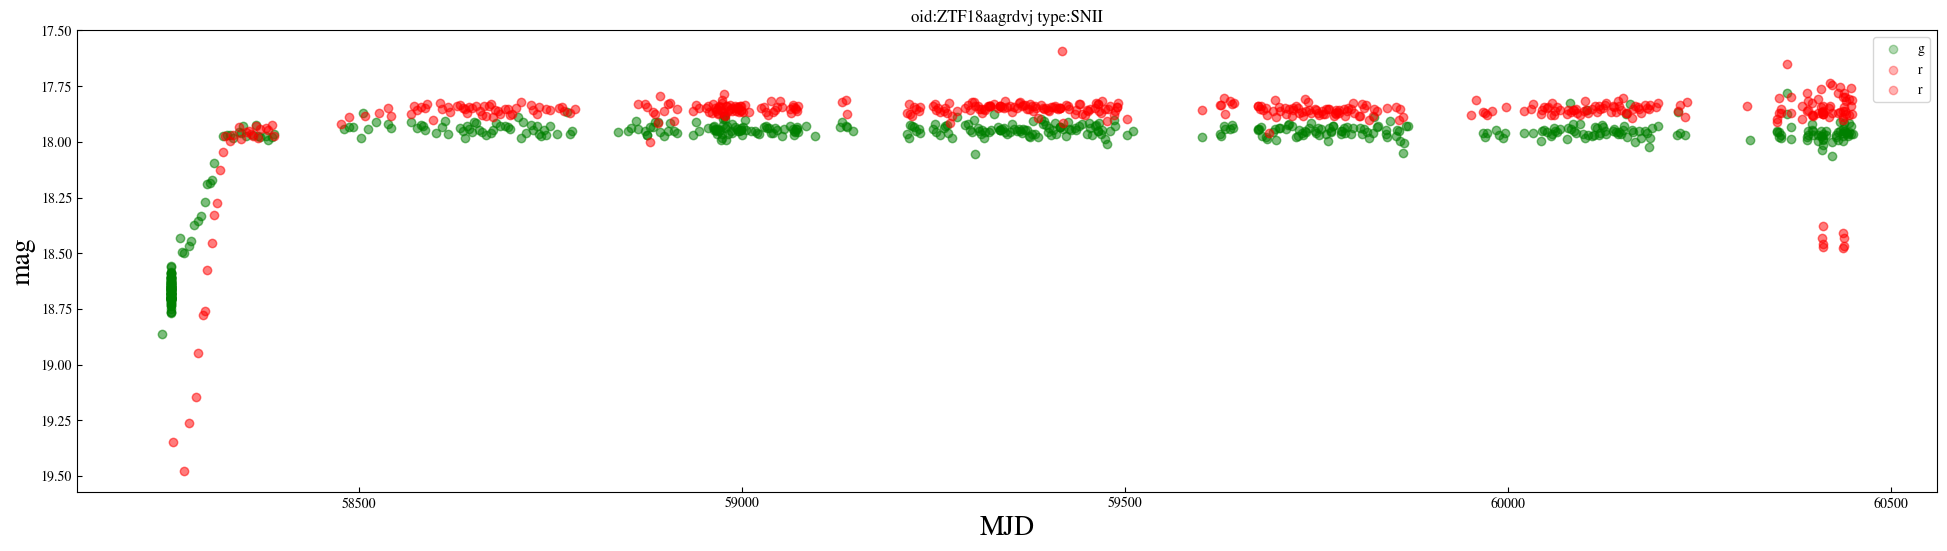

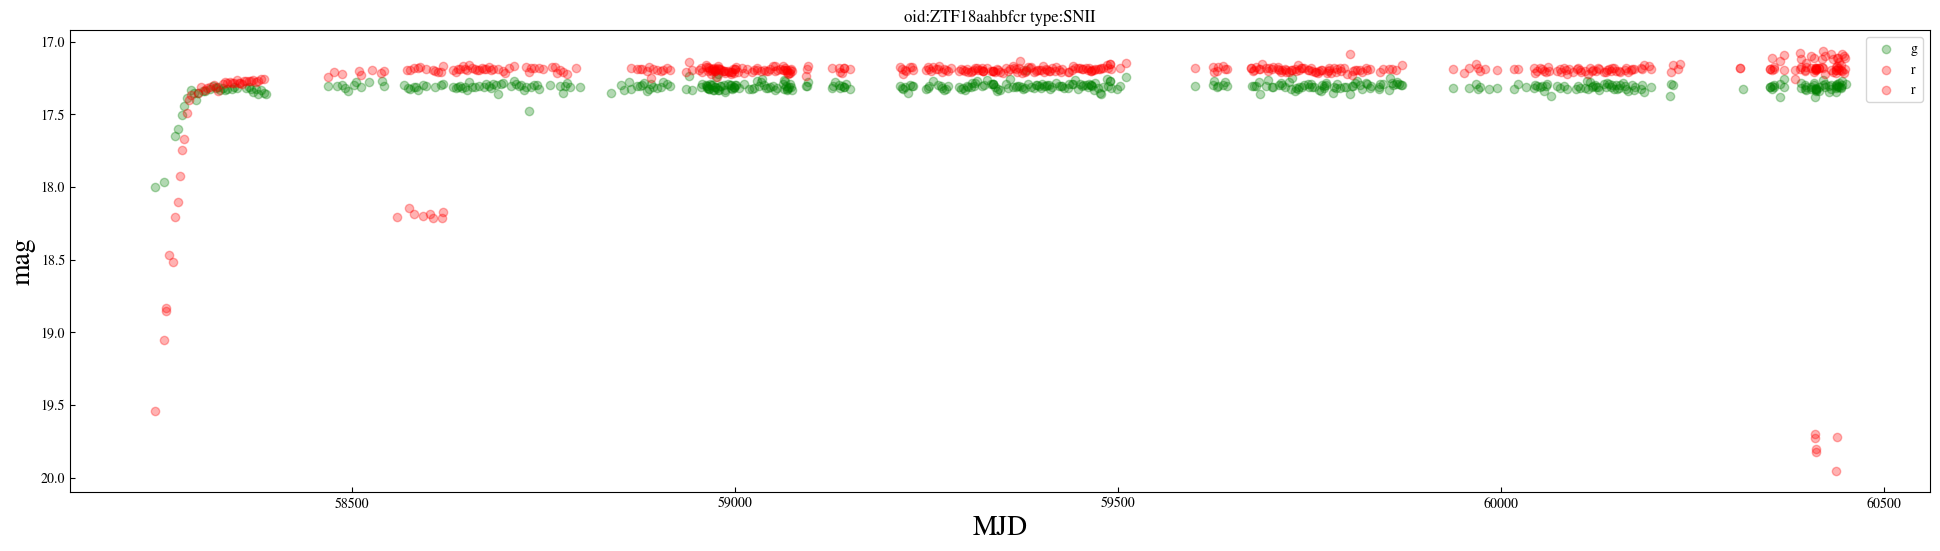

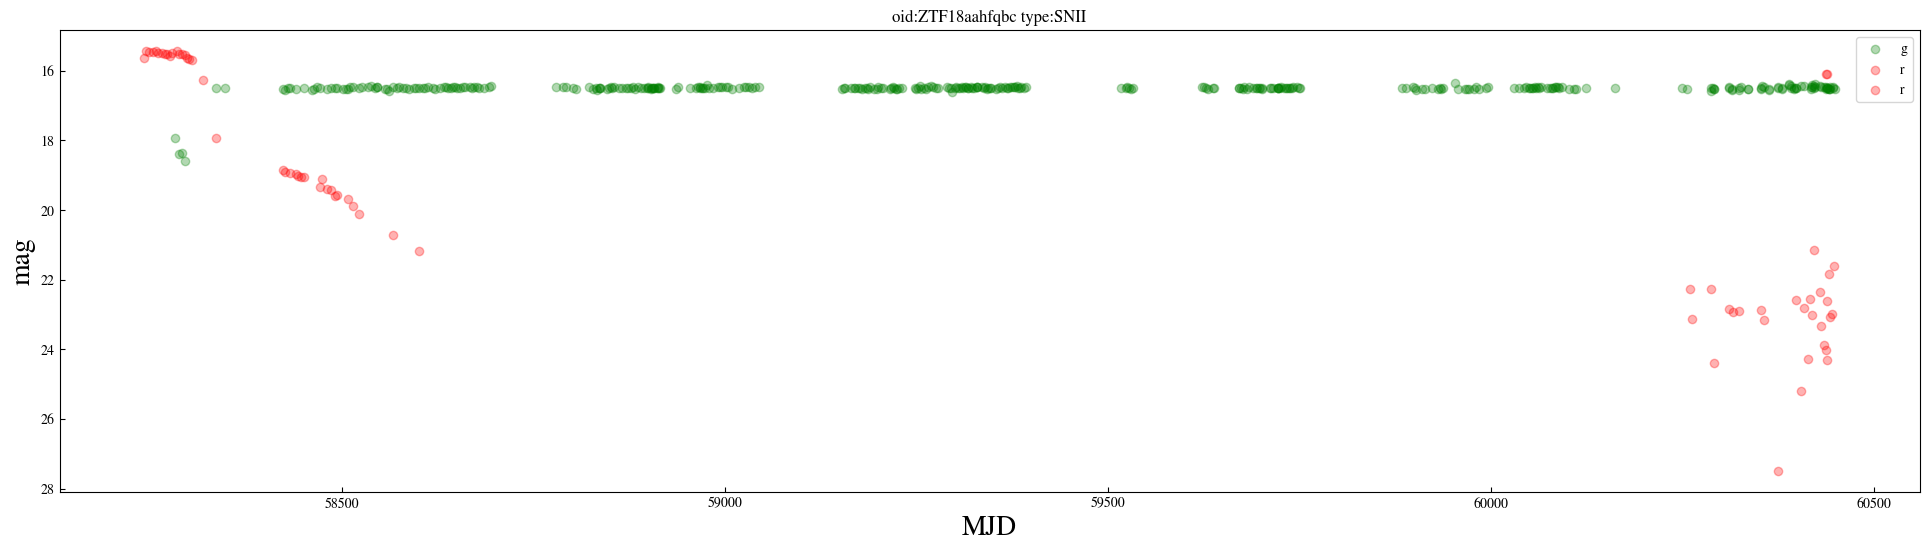

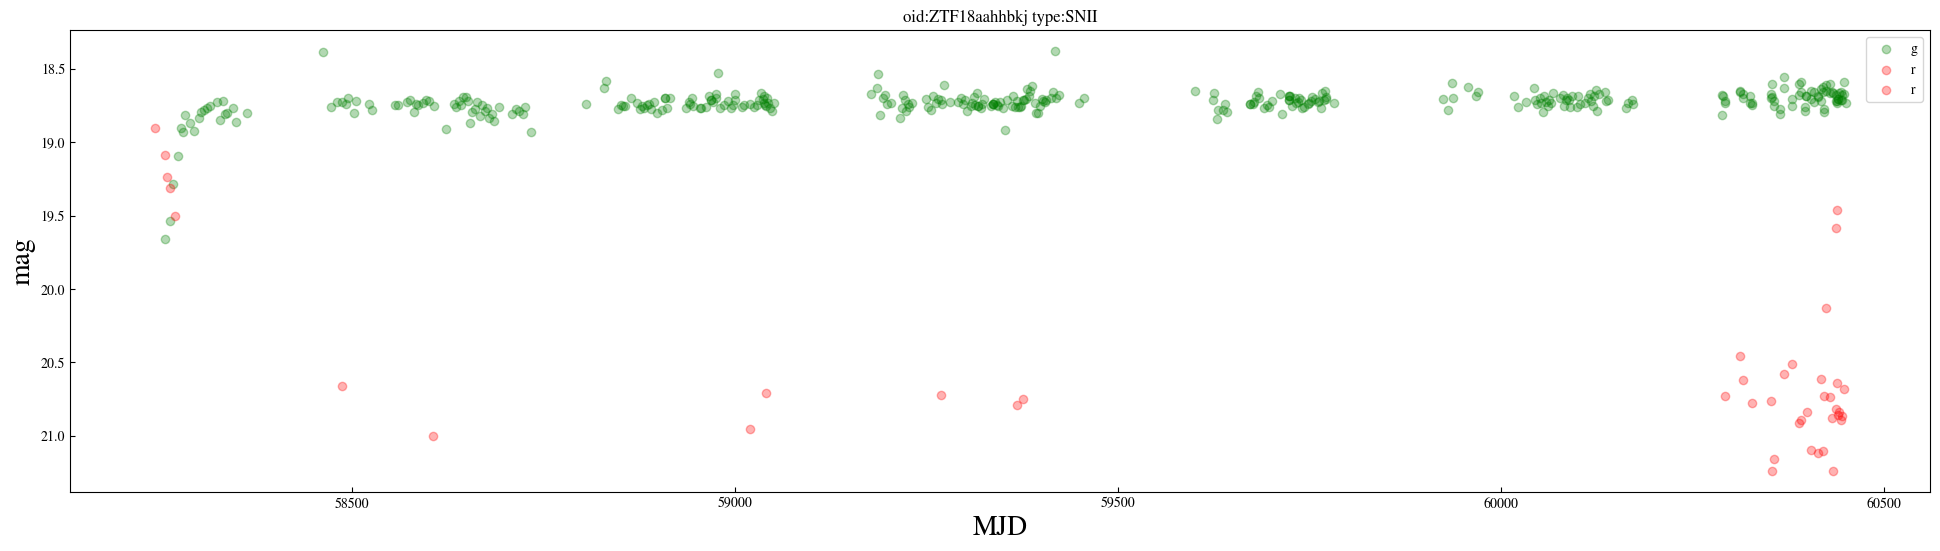

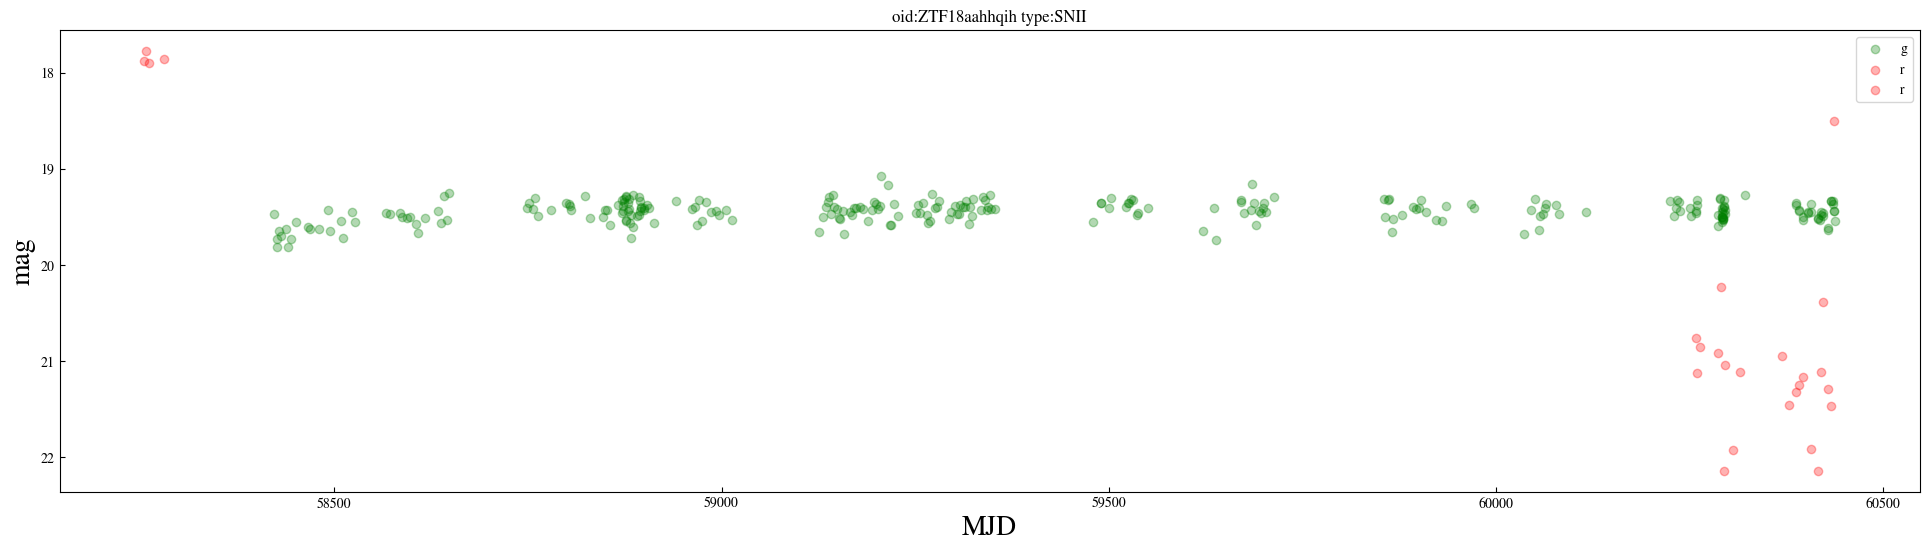

In [ ]:
sn_idx_list = np.arange(10,20,1)
def plotobject(df):
  fig, ax = plt.subplots(figsize=(24, 6))
  for fid, group_df in df.groupby('fid'):
      color = 'g' if fid == 1 else 'r'
      #ax.scatter(group_df.mjd, group_df.mag, alpha=0.3, c=color, marker='o' if group_df.forced !='yes' else 's')
      ax.scatter(group_df.mjd, group_df.mag, alpha=0.3, c=color, label=color)
  ax.set_title(f'oid:{df.oid.unique()[0]} type:{df.type.unique()[0]}')
  ax.set_xlabel("MJD", fontsize=20)
  ax.set_ylabel("mag", fontsize=20)
  ax.set_ylim(ax.get_ylim()[::-1])
  plt.legend()
  #plt.show()


main_sn_grouped = main_sn.groupby('oid')

#for oid, group_df in main_sn_grouped:}
    #plotobject(group_df)
for sn_idx in sn_idx_list:
    plotobject(main_sn_grouped.get_group(main_sn.oid.unique()[sn_idx]))


# Older

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astropy.coordinates import Distance
from astropy.cosmology import WMAP7

In [ ]:
%%capture
# This won't work in Colab
# you may need to restart the notebook after running the following lines
!pip install ipyaladin
!pip install astroquery
#!jupyter nbextension enable --py widgetsnbextension
#!jupyter nbextension enable --py --sys-prefix ipyaladin

In [ ]:
import ipyaladin as ipyal # see installation instructions here: https://github.com/cds-astro/ipyaladin

In [ ]:
#!pip install astroquery
from astroquery.ned import Ned
from astroquery.irsa_dust import IrsaDust

In [ ]:
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets

In [ ]:
#!pip install psycopg2-binary
import psycopg2

In [ ]:
import requests

In [ ]:
%%capture
!pip install alerce

In [ ]:
%%capture
!pip install astro-delight

In [ ]:
from delight.delight import *

In [ ]:
# color blind friendly green and red
colors = {1: '#56E03A', 2: '#D42F4B'}

In [ ]:
url = "https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json"
params = requests.get(url).json()['params']
params

In [ ]:
conn = psycopg2.connect(dbname=params['dbname'], user=params['user'], host=params['host'], password=params['password'])

In [ ]:
query='''
SELECT
    object.oid, object.meanra, object.meandec, object.ndet,
    object.firstMJD, object.deltajd, object.g_r_max,
    probability.classifier_name, probability.class_name,
    probability.ranking, probability.probability, classifier_version
FROM
    object INNER JOIN probability
    ON object.oid=probability.oid
WHERE
    probability.classifier_name='lc_classifier'
    AND object.oid IN
(
SELECT
    oid
FROM
    probability
WHERE
    classifier_name='lc_classifier'
    AND class_name IN ('SNIa', 'SNIbc', 'SNII', 'SLSN')
    AND ranking=1
    AND probability > 0.5
)
'''

SNe = pd.read_sql_query(query, conn)v
print(SNe.shape)
SNe.set_index('oid', inplace=True)
SNe.head()

In [ ]:
SNe.classifier_version.value_counts()

In [ ]:
SNe = SNe[SNe['classifier_version'] == 'hierarchical_rf_1.1.0']

In [ ]:
SNe_p = SNe.pivot(columns="class_name", values=['probability', 'ranking'])
SNe_p.head()

In [ ]:
mask = (SNe_p.ranking.SNII == 1)

query='''
SELECT
    oid, candid, mjd, fid, magpsf, sigmapsf
FROM
    detection
WHERE
    oid in (%s)
''' % ",".join(["'%s'" % oid for oid in SNe_p.loc[mask].index])
all_detections = pd.read_sql_query(query, conn)
all_detections.set_index(['candid'], inplace=True)
print(all_detections.shape)
all_detections.head()

In [ ]:
all_detections.groupby(["oid"]).head()

In [ ]:
len(all_detections.oid.unique())

In [ ]:
def plotobject(df):
    df.groupby(["fid"]).apply(
        lambda df:ax.plot(df.mjd, df.magpsf, alpha=0.3, c='g' if df.fid.unique()==1 else 'r'))
fig, ax = plt.subplots(figsize=(24, 6))
all_detections.groupby(["oid"]).apply(plotobject)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("MJD", fontsize=20)
ax.set_ylabel("mag", fontsize=20)

In [ ]:
query='''
SELECT
    *
FROM
    feature
WHERE
    LEFT(name, 3)='SPM'
    AND oid in (%s)
''' % ",".join(["'%s'" % oid for oid in SNe.loc[mask].index])
features = pd.read_sql_query(query, conn)
features.head()

In [ ]:
features.name.unique()

In [ ]:
query='''
SELECT
    detection.fid, detection.pid, detection.diffmaglim, detection.nid,
    detection.ra, detection.dec, detection.magpsf, detection.sigmapsf,
    detection.magap, detection.sigmagap,detection.mjd,
    object.oid, object.ndet, object.firstMJD,
    probability.classifier_name, probability.class_name,
    probability.ranking, probability.probability, classifier_version
FROM
    detection
    INNER JOIN probability
    ON detection.oid=probability.oid
    INNER JOIN object
    ON detection.oid=object.oid
WHERE
    probability.classifier_name='lc_classifier'
    AND detection.oid IN
(
SELECT
    oid
FROM
    probability
WHERE
    classifier_name='lc_classifier'
    AND class_name IN ('SNIa', 'SNIbc', 'SNII', 'SLSN')
    AND ranking=1
    AND probability > 0.5
)
'''

SNe = pd.read_sql_query(query, conn)
print(SNe.shape)
SNe.set_index('oid', inplace=True)
SNe.head()

In [ ]:
query='''
SELECT
    detection.fid, detection.pid, detection.diffmaglim, detection.nid,
    detection.ra, detection.dec, detection.magpsf, detection.sigmapsf,
    detection.magap, detection.sigmagap,detection.mjd,
    object.oid, object.ndet, object.firstMJD,
    probability.classifier_name, probability.class_name,
    probability.ranking, probability.probability, classifier_version
FROM
    detection
    INNER JOIN probability
    ON detection.oid=probability.oid
    INNER JOIN object
    ON detection.oid=object.oid
WHERE
    probability.classifier_name='lc_classifier'
    AND probability.class_name IN ('SNIa', 'SNIbc', 'SNII', 'SLSN')
    AND probability.ranking=1
    AND probability.probability > 0.5
'''

SNe = pd.read_sql_query(query, conn)
print(SNe.shape)
SNe.set_index('oid', inplace=True)
SNe.head()

In [ ]:
len(SNe.reset_index().oid.unique())

In [ ]:
SNe.classifier_version.value_counts()

In [ ]:
SNe = SNe[SNe['classifier_version'] == 'hierarchical_rf_1.1.0']

In [ ]:
mask = (SNe.class_name == 'SNII')
SNe = SNe[mask]

In [ ]:
len(SNe.reset_index().oid.unique())

In [ ]:
def plotobject(df):
    df.groupby(["fid"]).apply(
        lambda df:ax.plot(df.mjd, df.magpsf, alpha=0.3, c='g' if df.fid.unique()==1 else 'r'))
fig, ax = plt.subplots(figsize=(24, 6))
SNe.groupby(["oid"]).apply(plotobject)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("MJD", fontsize=20)
ax.set_ylabel("mag", fontsize=20)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

rc_params = {
    'lines.linewidth': 2,  # Set line width to 2 points
    'font.family': 'STIXGeneral',  # Set color cycle for axes
    'ytick.direction': 'in',  # Set figure size in inches
    'xtick.direction': 'in',  # Set default font family
}

matplotlib.rcParams.update(rc_params)
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
tns_df = pd.read_csv("/gdrive/MyDrive/Supernovas_ThesisSteve/SN_dataset/tns_public_objects.csv", comment="#",skiprows=[0])
tns_df.head()
def prepared_tns(df):

    '''
    sasasa
    '''

    # Mask filters by Supernovae (SN)
    # from the initial DataSet
    mask = df.name_prefix == 'SN'

    # Use the previos mask
    df = df.loc[mask]

    # Dropping by myself the useless columns
    try:
        columns_droped = ['reporting_groupid', 'reporting_group',
       'source_groupid', 'source_group', 'discoverydate', 'discoverymag',
       'discmagfilter','reporters', 'time_received',
       'internal_names', 'Discovery_ADS_bibcode', 'Class_ADS_bibcodes',
       'creationdate', 'lastmodified']
        df = df.drop(columns_droped, axis=1)
    except:
        pass

    return df
tns_df = prepared_tns(tns_df)
tns_df
fig, ax = plt.subplots(figsize=(10, 13))
tns_df.type.value_counts().plot.barh(log=True, ax=ax)
import psycopg2
import requests
credentials_file = "https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json"
params = requests.get(credentials_file).json()["params"]
conn = psycopg2.connect(dbname=params["dbname"], user=params["user"], host=params["host"], password=params["password"])
def ztf_crossmatch(conn, df, search_radius=1):

    '''
    conn: connection to database
    df: external catalog dataframe (with columns id_source, ra, dec)
    search_radius: external radius in arcsec (default=1)

    The output is a dataframe with the source id, ra, and dec,
    as well as the ALeRCE database meanra, meandec, the crossmatch distance
    in degrees and the time of first detection according to the ALeRCE database
    '''

    # fix the dataframe
    objects = []
    for _,row in df.iterrows():
        objects.append(f"(\'{row.id_source}\', {row.ra}, {row.dec})")
    objects_str = ",\n".join(objects)

    # convert the radius into degrees
    search_radius = search_radius / 3600

    # prepare the query

    query = """
    WITH catalog ( source_id, ra, dec) AS (
        VALUES
            {values}
    )
    SELECT
        c.source_id, c.ra, c.dec, o.oid, o.meanra, o.meandec, q3c_dist(c.ra,c.dec,o.meanra,o.meandec),
        o.firstmjd

    FROM object o, catalog c
        /*
         * It is REALLY important to first use the catalog then the object ra,dec for speed. The radius is in degrees.
         */
    WHERE
        q3c_join(c.ra, c.dec,o.meanra, o.meandec, {radius})
    """

    # final query string
    query_str = query.format(values=objects_str, radius=search_radius) # radius in degrees

    # do the query
    try:
        matches = pd.read_sql(query_str,conn)
        matches["q3c_dist"] = matches.q3c_dist * 3600
        matches.rename({"q3c_dist": "dist_arcsec"}, axis=1, inplace=True)
        return matches
    except:
        print("Error accessing the database. Most common causes are timeout errors or wrongly formatted input query.")
dfsn = tns_df[["name", "ra", "declination"]].rename({"name": "id_source", "declination":"dec"},axis=1)

results = ztf_crossmatch(conn, dfsn)
results
results.dist_arcsec.plot.hist()
def supernovae_ztfxtns(tns_df, xztf_df,apply_mask=True):

    fmap = {'TDE': "TDE",
        'Nova': "CV/Nova",
        'CV': "CV/Nova",
        'SN Ia-91bg-like': "SNIa",
        'SN Ia': "SNIa",
        'SN Ia-91T-like': "SNIa",
        'SN Ia-CSM': "SNIa",
        'SN Ia-SC': "SNIa",
        'SN Ia-pec': "SNIa",
        'SN Iax[02cx-like]': "SNIa",
        'SN Ib': "SNIbc",
        'SN Ib-Ca-rich': "SNIbc",
        'SN Ib-pec': "SNIbc",
        'SN Ib/c': "SNIbc",
        'SN Ibn': "SNIbc",
        'SN Ic': "SNIbc",
        'SN Icn': "SNIbc",
        'SN Ic-BL': "SNIbc",
        'SN Ic-pec': "SNIbc",
        'SN IIb': "SNIIb",
        'SN II': "SNII",
        'SN II-pec' : "SNII",
        'SN IIL': "SNII",
        'SN IIP': "SNII",
        'SN IIn': "SNIIn",
        'SN IIn-pec': "SNIIn",
        'SLSN-I': "SLSN",
        'SLSN-II': "SLSN",
        'SN Ibn/Icn': "SNIbc",
        'SN Ia-Ca-rich': "SNIa",
        'SN Ic-Ca-rich': "SNIc",
        'SN I': 'SNI'
    }

    xztf_df = xztf_df.copy()
    dfsn = tns_df.copy()

    dfsn = dfsn.replace({'type':fmap})
    dfsn = dfsn.rename({'name':'source_id'},axis=1)
    xztf_df = xztf_df.merge(dfsn[['source_id','type','redshift','filter']], on='source_id', how='left')
    dfsn.set_index('source_id', inplace=True)
    dfsn = dfsn.loc[xztf_df.source_id]

    # Mask will use to obtain a subset of a specific class
    # of supernovae. The classes are: CV/Nova, SNIa, SNIbc,
    # SNIIb, SNII, SNIIn, SLSN

    if apply_mask == True:
        #mask = dfsn.type == 'SNII'
        mask = dfsn.type.isin(('SNII', 'SNIIn', 'SNIIb'))
        dfsn = dfsn.loc[mask]

    dfsn.reset_index(inplace=True)
    #dfsn = dfsn[['oid','soruce_id','ra','dec','meanra','meandec','dist_arcsec','firstmjd','type','redshift','filter']]
    #dfsn = dfsn.reindex_axis(['oid','soruce_id','ra','dec','meanra','meandec','dist_arcsec','firstmjd','type','redshift','filter'], axis=1)

    xztf_df.set_index('source_id',inplace=True)
    xztf_df = xztf_df.loc[dfsn.source_id]
    xztf_df.reset_index(inplace=True)

    return xztf_df
dfsn = supernovae_ztfxtns(tns_df=tns_df,xztf_df = results)
dfsn
def querys_alerce(dfsn):

    query_1='''
    SELECT
        detection.oid, detection.fid, detection.mjd, detection.magpsf, detection.sigmapsf, detection.isdiffpos,
        detection.rfid, detection.candid
    FROM
        detection

    WHERE
        oid in (%s)
    ''' % ",".join(["'%s'" % oid for oid in dfsn.oid.unique()])

    SNe_detection = pd.read_sql_query(query_1, conn)


    query_2='''
    SELECT
        forced_photometry.oid, forced_photometry.fid, forced_photometry.mjd, forced_photometry.mag,
        forced_photometry.e_mag, forced_photometry.pid
    FROM
        forced_photometry

    WHERE
        oid in (%s)
    ''' % ",".join(["'%s'" % oid for oid in dfsn.oid.unique()])

    SNe_forced = pd.read_sql_query(query_2, conn)

    SNe_forced['forced'] = 'yes'

    SNe_detection = SNe_detection.rename({'magpsf':'mag', 'sigmapsf':'e_mag'},axis=1)

    result = pd.concat([SNe_detection,SNe_forced])
    result.sort_values(by='oid').reset_index(inplace=True)
    result['forced'] = result['forced'].fillna('no')

    result = result.merge(dfsn[['source_id','oid','type','redshift','filter']], on='oid', how='left')

    return result
main_sn = querys_alerce(dfsn=dfsn)
main_sn

# cambair el nombre el filter porque es reservada
fig, ax = plt.subplots(figsize=(10, 13))
main_sn.type.value_counts().plot.barh(log=True, ax=ax)
len(main_sn.oid.unique())
main_sn
main_sn.to_csv('/gdrive/MyDrive/SN_dataset_ztfxtns.csv', index=False)
sn_idx_list = np.arange(10,20,1)
def plotobject(df):
  fig, ax = plt.subplots(figsize=(24, 6))
  for fid, group_df in df.groupby('fid'):
      color = 'g' if fid == 1 else 'r'
      markers = ['s' if forced == 'yes' else 'o' for forced in group_df['forced']]
      #ax.scatter(group_df.mjd, group_df.mag, alpha=0.3, c=color, marker='o' if group_df.forced !='yes' else 's')
      for marker, row in zip(markers, group_df.itertuples()):
            ax.scatter(row.mjd, row.mag, alpha=0.3, c=color, marker=marker, label=color)
  ax.set_title(f'oid:{df.oid.unique()[0]} type:{df.type.unique()[0]}')
  ax.set_xlabel("MJD", fontsize=20)
  ax.set_ylabel("mag", fontsize=20)
  ax.set_ylim(ax.get_ylim()[::-1])
  plt.legend()
  #plt.show()


main_sn_grouped = main_sn.groupby('oid')

#for oid, group_df in main_sn_grouped:}
    #plotobject(group_df)
for sn_idx in sn_idx_list:
    plotobject(main_sn_grouped.get_group(main_sn.oid.unique()[sn_idx]))




# Older
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astropy.coordinates import Distance
from astropy.cosmology import WMAP7
%%capture
# This won't work in Colab
# you may need to restart the notebook after running the following lines
!pip install ipyaladin
!pip install astroquery
#!jupyter nbextension enable --py widgetsnbextension
#!jupyter nbextension enable --py --sys-prefix ipyaladin
import ipyaladin as ipyal # see installation instructions here: https://github.com/cds-astro/ipyaladin
#!pip install astroquery
from astroquery.ned import Ned
from astroquery.irsa_dust import IrsaDust
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets
#!pip install psycopg2-binary
import psycopg2
import requests
%%capture
!pip install alerce
%%capture
!pip install astro-delight
from delight.delight import *
# color blind friendly green and red
colors = {1: '#56E03A', 2: '#D42F4B'}
url = "https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json"
params = requests.get(url).json()['params']
params
conn = psycopg2.connect(dbname=params['dbname'], user=params['user'], host=params['host'], password=params['password'])
query='''
SELECT
    object.oid, object.meanra, object.meandec, object.ndet,
    object.firstMJD, object.deltajd, object.g_r_max,
    probability.classifier_name, probability.class_name,
    probability.ranking, probability.probability, classifier_version
FROM
    object INNER JOIN probability
    ON object.oid=probability.oid
WHERE
    probability.classifier_name='lc_classifier'
    AND object.oid IN
(
SELECT
    oid
FROM
    probability
WHERE
    classifier_name='lc_classifier'
    AND class_name IN ('SNIa', 'SNIbc', 'SNII', 'SLSN')
    AND ranking=1
    AND probability > 0.5
)
'''

SNe = pd.read_sql_query(query, conn)v
print(SNe.shape)
SNe.set_index('oid', inplace=True)
SNe.head()
SNe.classifier_version.value_counts()
SNe = SNe[SNe['classifier_version'] == 'hierarchical_rf_1.1.0']
SNe_p = SNe.pivot(columns="class_name", values=['probability', 'ranking'])
SNe_p.head()
mask = (SNe_p.ranking.SNII == 1)

query='''
SELECT
    oid, candid, mjd, fid, magpsf, sigmapsf
FROM
    detection
WHERE
    oid in (%s)
''' % ",".join(["'%s'" % oid for oid in SNe_p.loc[mask].index])
all_detections = pd.read_sql_query(query, conn)
all_detections.set_index(['candid'], inplace=True)
print(all_detections.shape)
all_detections.head()
all_detections.groupby(["oid"]).head()
len(all_detections.oid.unique())
def plotobject(df):
    df.groupby(["fid"]).apply(
        lambda df:ax.plot(df.mjd, df.magpsf, alpha=0.3, c='g' if df.fid.unique()==1 else 'r'))
fig, ax = plt.subplots(figsize=(24, 6))
all_detections.groupby(["oid"]).apply(plotobject)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("MJD", fontsize=20)
ax.set_ylabel("mag", fontsize=20)
query='''
SELECT
    *
FROM
    feature
WHERE
    LEFT(name, 3)='SPM'
    AND oid in (%s)
''' % ",".join(["'%s'" % oid for oid in SNe.loc[mask].index])
features = pd.read_sql_query(query, conn)
features.head()
features.name.unique()
query='''
SELECT
    detection.fid, detection.pid, detection.diffmaglim, detection.nid,
    detection.ra, detection.dec, detection.magpsf, detection.sigmapsf,
    detection.magap, detection.sigmagap,detection.mjd,
    object.oid, object.ndet, object.firstMJD,
    probability.classifier_name, probability.class_name,
    probability.ranking, probability.probability, classifier_version
FROM
    detection
    INNER JOIN probability
    ON detection.oid=probability.oid
    INNER JOIN object
    ON detection.oid=object.oid
WHERE
    probability.classifier_name='lc_classifier'
    AND detection.oid IN
(
SELECT
    oid
FROM
    probability
WHERE
    classifier_name='lc_classifier'
    AND class_name IN ('SNIa', 'SNIbc', 'SNII', 'SLSN')
    AND ranking=1
    AND probability > 0.5
)
'''

SNe = pd.read_sql_query(query, conn)
print(SNe.shape)
SNe.set_index('oid', inplace=True)
SNe.head()
query='''
SELECT
    detection.fid, detection.pid, detection.diffmaglim, detection.nid,
    detection.ra, detection.dec, detection.magpsf, detection.sigmapsf,
    detection.magap, detection.sigmagap,detection.mjd,
    object.oid, object.ndet, object.firstMJD,
    probability.classifier_name, probability.class_name,
    probability.ranking, probability.probability, classifier_version
FROM
    detection
    INNER JOIN probability
    ON detection.oid=probability.oid
    INNER JOIN object
    ON detection.oid=object.oid
WHERE
    probability.classifier_name='lc_classifier'
    AND probability.class_name IN ('SNIa', 'SNIbc', 'SNII', 'SLSN')
    AND probability.ranking=1
    AND probability.probability > 0.5
'''

SNe = pd.read_sql_query(query, conn)
print(SNe.shape)
SNe.set_index('oid', inplace=True)
SNe.head()
len(SNe.reset_index().oid.unique())
SNe.classifier_version.value_counts()
SNe = SNe[SNe['classifier_version'] == 'hierarchical_rf_1.1.0']
mask = (SNe.class_name == 'SNII')
SNe = SNe[mask]
len(SNe.reset_index().oid.unique())
def plotobject(df):
    df.groupby(["fid"]).apply(
        lambda df:ax.plot(df.mjd, df.magpsf, alpha=0.3, c='g' if df.fid.unique()==1 else 'r'))
fig, ax = plt.subplots(figsize=(24, 6))
SNe.groupby(["oid"]).apply(plotobject)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("MJD", fontsize=20)
ax.set_ylabel("mag", fontsize=20)
